# Modelagem Hepatite - Regressão Linear
#### Alex Cecconi de Souza 

## Preprocessamento dos dados

In [1]:
#Pacote de dados
import pandas as pd
import numpy as np

In [2]:
#importa dados
list_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN",
              "ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]
df = pd.read_csv(r"C:\Users\Alex\Desktop\Aprendizado_de_Maquina\Atividade_01\Hepatite\hepatitis.data", sep=",", names = list_names)

In [3]:
#Visualiza top 10
df.head(n=10)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [4]:
#Filtra X e Y
y = df.iloc[:,0]
X = df.iloc[:,1:21]

In [5]:
#X.describe()

In [6]:
#Tipo dos dados
pd.DataFrame(X.dtypes).T

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,int64,int64,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64


In [7]:
#Substitui '?' por valor nulo
X.replace('?',np.nan, inplace = True)

In [8]:
pd.DataFrame(X).T

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
AGE,30,50,78,31,34,34,51,23,39,30,...,31,41,70,20,36,46,44,61,53,43
SEX,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,1
STEROID,1,1,2,NaN,2,2,1,2,2,2,...,1,2,1,1,2,2,2,1,1,2
ANTIVIRALS,2,2,2,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
FATIGUE,2,1,1,2,2,2,1,2,1,2,...,1,1,1,2,2,1,1,1,1,1
MALAISE,2,2,2,2,2,2,2,2,2,2,...,2,2,1,2,2,1,2,1,2,2
ANOREXIA,2,2,2,2,2,2,1,2,2,2,...,2,2,1,2,2,1,2,2,2,2
LIVER BIG,1,1,2,2,2,2,2,2,2,2,...,2,2,NaN,2,2,2,2,1,2,2
LIVER FIRM,2,2,2,2,2,2,2,2,1,2,...,2,1,NaN,NaN,2,2,1,1,2,2
SPLEEN PALPABLE,2,2,2,2,2,2,1,2,2,2,...,2,1,NaN,2,2,2,2,2,1,1


In [9]:
X['ANTIVIRALS'].unique()

array([2, 1], dtype=int64)

In [10]:
#Preenche os nulos de toda a tabela com a media desconsiderando os nulos, aplica direto
X.fillna( X.median(skipna = True ), inplace = True)

In [11]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
AGE,30,50,78,31,34,34,51,23,39,30,...,31,41,70,20,36,46,44,61,53,43
SEX,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,1
STEROID,1,1,2,2,2,2,1,2,2,2,...,1,2,1,1,2,2,2,1,1,2
ANTIVIRALS,2,2,2,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
FATIGUE,2,1,1,2,2,2,1,2,1,2,...,1,1,1,2,2,1,1,1,1,1
MALAISE,2,2,2,2,2,2,2,2,2,2,...,2,2,1,2,2,1,2,1,2,2
ANOREXIA,2,2,2,2,2,2,1,2,2,2,...,2,2,1,2,2,1,2,2,2,2
LIVER BIG,1,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,2,2
LIVER FIRM,2,2,2,2,2,2,2,2,1,2,...,2,1,2,2,2,2,1,1,2,2
SPLEEN PALPABLE,2,2,2,2,2,2,1,2,2,2,...,2,1,2,2,2,2,2,2,1,1


In [12]:
from sklearn import preprocessing

In [13]:
#
Scaler =preprocessing.StandardScaler()
X.iloc[:,[0,13,14,15,16,17]] = Scaler.fit_transform(X.iloc[:,[0,13,14,15,16,17]] )

In [14]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
AGE,-0.894192,0.702579,2.93806,-0.814353,-0.574838,-0.574838,0.782418,-1.45306,-0.175645,-0.894192,...,-0.814353,-0.0159677,2.29935,-1.69258,-0.41516,0.383225,0.223548,1.5808,0.942095,0.143709
SEX,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,1
STEROID,1,1,2,2,2,2,1,2,2,2,...,1,2,1,1,2,2,2,1,1,2
ANTIVIRALS,2,2,2,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
FATIGUE,2,1,1,2,2,2,1,2,1,2,...,1,1,1,2,2,1,1,1,1,1
MALAISE,2,2,2,2,2,2,2,2,2,2,...,2,2,1,2,2,1,2,1,2,2
ANOREXIA,2,2,2,2,2,2,1,2,2,2,...,2,2,1,2,2,1,2,2,2,2
LIVER BIG,1,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,2,2
LIVER FIRM,2,2,2,2,2,2,2,2,1,2,...,2,1,2,2,2,2,1,1,2,2
SPLEEN PALPABLE,2,2,2,2,2,2,1,2,2,2,...,2,1,2,2,2,2,2,2,1,1


-----------

# Classificação Linear

Com esta equação nos encontramos os pesos \
$\overrightarrow{w} =  (  X^{t}X )^{-1}  X^{t}\overrightarrow{y}   $

In [25]:
y = y_train.astype(float)

In [26]:
X = X_train.astype(float)

In [40]:
X_T = X.transpose()

In [39]:
X_Mult = X_T.dot(X)


In [38]:
df_inv = np.linalg.inv(X_Mult)

In [30]:
pseudo_inv = df_inv.dot(X_T)

In [31]:
omega1 = pseudo_inv.dot(y)
omega1.shape
len(X)

82

Abaixo temos o classificador, podemos definir um limiar em que teremos as classes\
$h(\overrightarrow{w}) = \overrightarrow{w} \cdot \overrightarrow{x}$

In [32]:
#Aqui estou aplicando os omegas treinados na base de teste para tentar predizer estes caras.
F_x1 = omega1*X_test.astype(float)
F_x1.head(n=10)

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
120,-0.081519,0.141042,0.089722,0.156562,-0.055313,0.137656,0.010534,-0.169246,-0.129291,0.215721,0.217929,1.127978,0.05324,-0.004094,0.008748,-0.007769,0.002964,-0.000361,0.070454
117,-0.048471,0.141042,0.179443,0.156562,-0.110626,0.275312,0.021069,-0.338493,-0.258582,0.215721,0.435858,1.127978,0.05324,0.001130,-0.028455,0.000478,0.001155,0.000385,0.070454
39,-0.131091,0.141042,0.179443,0.156562,-0.055313,0.137656,0.021069,-0.338493,-0.129291,0.107861,0.217929,0.563989,0.05324,0.003055,-0.059584,0.003686,-0.016933,0.009335,0.070454
90,-0.048471,0.282084,0.089722,0.156562,-0.055313,0.275312,0.021069,-0.169246,-0.129291,0.107861,0.217929,1.127978,0.05324,0.001405,-0.097546,-0.003646,-0.007889,-0.015278,0.070454
119,-0.070503,0.141042,0.179443,0.156562,-0.055313,0.275312,0.021069,-0.169246,-0.129291,0.215721,0.435858,1.127978,0.05324,-0.004919,0.012545,0.006549,-0.000654,-0.000361,0.070454
84,-0.114567,0.282084,0.179443,0.156562,-0.055313,0.137656,0.021069,-0.338493,-0.129291,0.215721,0.217929,1.127978,0.05324,0.000305,-0.029973,-0.008113,0.001155,-0.002598,0.035227
89,0.017626,0.141042,0.089722,0.156562,-0.055313,0.137656,0.010534,-0.169246,-0.129291,0.215721,0.435858,1.127978,0.05324,0.002230,0.019378,0.007695,0.010199,0.016793,0.070454
45,0.072706,0.141042,0.179443,0.156562,-0.055313,0.137656,0.021069,-0.338493,-0.258582,0.215721,0.435858,1.127978,0.05324,0.001955,0.020896,-0.002844,0.010199,-0.000361,0.035227
54,0.061690,0.141042,0.179443,0.156562,-0.055313,0.275312,0.021069,-0.338493,-0.258582,0.215721,0.435858,1.127978,0.05324,0.001955,0.039118,0.000822,0.006582,0.009335,0.035227
107,-0.020930,0.141042,0.089722,0.156562,-0.055313,0.137656,0.010534,-0.338493,-0.258582,0.215721,0.435858,1.127978,0.05324,-0.002445,0.012545,-0.064471,0.002964,-0.000361,0.070454


In [33]:
Acuracia = np.sum( np.where( (F_x1).sum(axis=1) >1.5,2,1) == y_test ) / y_test.shape[0]
Acuracia

0.8269230769230769

Aqui temos os betas com fator de regularização\
$\overrightarrow{w} =  (  \gamma I + X^{t}X )^{-1}  X^{t}\overrightarrow{y}   $

In [34]:
#Aplicando o gamma de regularização e avaliando o modeloa na base de validação
Valores = []
gama = 0
for gama in range(0,1000,10):
    omega2 = np.linalg.inv( np.multiply(gama,np.identity(19)) + X.T.dot(X)).dot(X.T).dot(y)
    F_x2 = omega2*X_valid.astype(float)
    Acuracia = np.sum( np.where( (F_x2).sum(axis=1) >1.5,2,1) == y_valid ) / y_valid.shape[0]
    Valores.append(Acuracia)            
            

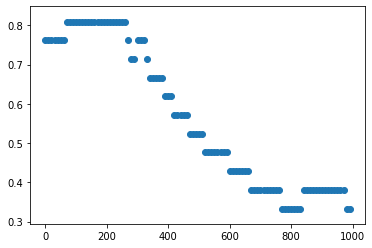

In [37]:
import matplotlib.pyplot as plt
plt.scatter(range(0,1000,10),Valores)
plt.show()

In [36]:
#Avaliando o modelo com a base de teste
gama = 180
omega2 = np.linalg.inv( np.multiply(gama,np.identity(19)) + X.T.dot(X)).dot(X.T).dot(y)
F_x2 = omega2*X_test.astype(float)
Acuracia = np.sum( np.where( (F_x2).sum(axis=1) >1.5,2,1) == y_test ) / y_test.shape[0]
Acuracia   

0.7692307692307693

# FIM